In [1]:
import pykat
from pykat import finesse
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches

#import utils_DRFPMI as utl
   
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



# Somiya-san tuning1

Parsing `pause 3` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2020-12-07 18:14:26.364425
 95% | ETA:  0:00:00 | Calculating                                             Used Finesse None at C:\Users\pirik\anaconda3\envs\py37\Library\bin\kat.exe

Finished in 5.57242 seconds

** Amplitude detector 'CR_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2m_REFL' specified without mode indices, computing average amplitude (and dummy phase) 

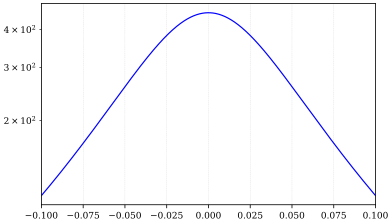

In [105]:
#宗宮さんのやり方のtuning1に相当
#アシンメトリーを同じにする。
#n0のウェスト位置(z)とレイリーレンジ(z_R)を得る。

base = finesse.kat()
base.verbose=True
base.parse("""
    const f1 16.881M
    const f2 45.0159M
    const mf1 -16.881M
    const mf2 -45.0159M
    # ======== Input optics =====================
    l i1 1 0 n0
    s s_eo0 0 n0 n_eo1
    mod eom1 $f1 0.3 1 pm n_eo1 n_eo2
    s s_eo1 0 n_eo2 n_eo3
    mod eom2 $f2 0.3 1 pm n_eo3 n_eo4
    s s_eo2 0 n_eo4 nREFL

    
    # ======= Michelson ========================
    bs bs1 0.5 0.5 0 45 nREFL n2 n3 nAS
    s lx 24.7369 n3 nx1		#lx=ly #((26.4018+23.072)/2)
    s ly 24.7369 n2 ny1


    # ======== Thick ITMs ======================
    m IXAR 0 1 0 nx1 nx2
    s thick_IX 0.15 1.754 nx2 nx3
    m ITMX 0.996 0.004 0 nx3 nx4

    m IYAR 0 1 0 ny1 ny2
    s thick_IY 0.15 1.754 ny2 ny3
    m ITMY 0.996 0.004 90 ny3 ny4

    # ========== Arm =======================
    s sx1 3000 nx4 nx5
    m ETMX 0.999995 5e-06 0 nx5 nTMSX
    
    s sy1 3000 ny4 ny5
    m ETMY 0.999995 5e-06 90 ny5 nTMSY
    
    ad CR_REFL 0 nREFL
    ad SB1p_REFL $f1 nREFL
    ad SB1m_REFL $mf1 nREFL
    ad SB2p_REFL $f2 nREFL
    ad SB2m_REFL $mf2 nREFL

    pd0 REFL nREFL
    pd0 TMSX nTMSX
    
    ad CR_TMSX 0 nTMSX
    ad SB1p_TMSX $f1 nTMSX
    ad SB1m_TMSX $mf1 nTMSX
    ad SB2p_TMSX $f2 nTMSX
    ad SB2m_TMSX $mf2 nTMSX
    
    # =========  HOM Expansion =======
    #attr bs1 Rc 0
    attr ITMX Rc -1900.   # measured -1904.6
    attr ETMX Rc 1900.    # measured  1908.24
    attr ITMY Rc -1900    # measured -1904.4
    attr ETMY Rc 1900.    # measured  1905.55
    attr IXAR Rc 0
    attr IYAR Rc 0

    cav XARM ITMX nx4 ETMX nx5
    cav YARM ITMY ny4 ETMY ny5


    """)
base.parse("""
### tuning
pd0 pd_nx5 nx5 #ETMx transmission
xaxis* ETMX phi lin -0.1 0.1 1000
yaxis lin abs
pause 3
trace 8
maxtem 5
""")
a = base.run()
print(a.rundata)

plt.figure(1)
plt.semilogy(a.x, a["pd_nx5"])

In [106]:

print((26.4018+23.072)/2)

24.7369


## Add gauss command(not cav command)

--------------------------------------------------------------
Running kat - Started at 2020-12-07 19:38:14.025264
 92% | ETA:  0:00:00 | Calculating                                             Used Finesse None at C:\Users\pirik\anaconda3\envs\py37\Library\bin\kat.exe

Finished in 0.623043 seconds

** Amplitude detector 'CR_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'CR_TMSX' specified without mode indice

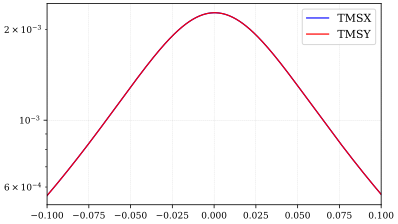

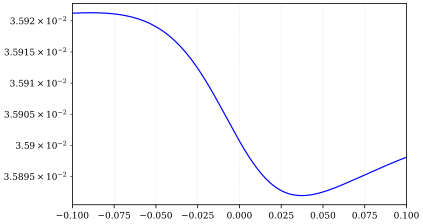

In [74]:
#ガウスコマンドを使い、n0地点にセット
base1_gauss = finesse.kat()
base1_gauss.verbose=True
base1_gauss.parse("""
    const f1 16.881M
    const f2 45.0159M
    const mf1 -16.881M
    const mf2 -45.0159M
    # ======== Input optics =====================
    l i1 1 0 n0
    s s_eo0 0 n0 n_eo1
    mod eom1 $f1 0.3 1 pm n_eo1 n_eo2
    s s_eo1 0 n_eo2 n_eo3
    mod eom2 $f2 0.3 1 pm n_eo3 n_eo4
    s s_eo2 0 n_eo4 nREFL

    
    # ======= Michelson ========================
    bs bs1 0.5 0.5 0 45 nREFL n2 n3 nAS
    s lx 26.4018 n3 nx1		#26.6649-thickness*1.754 #thicknese=0.15
    s ly 23.072 n2 ny1		#23.3351-thickness*1.754

    # ======== Thick ITMs ======================
    m IXAR 0 1 0 nx1 nx2
    s thick_IX 0.15 1.754 nx2 nx3
    m ITMX 0.996 0.004 0 nx3 nx4
    #m ITMX 0.996 0.004 -0.001 nx3 nx4

    m IYAR 0 1 0 ny1 ny2
    s thick_IY 0.15 1.754 ny2 ny3
    m ITMY 0.996 0.004 90 ny3 ny4
    #m ITMY 0.996 0.004 89.999 ny3 ny4

    # ========== Arm =======================
    s sx1 3000 nx4 nx5
    m ETMX 0.999995 5e-06 0 nx5 nTMSX
    #m ETMX 0.999995 5e-06 0.0085 nx5 nTMSX

    s sy1 3000 ny4 ny5
    m ETMY 0.999995 5e-06 90 ny5 nTMSY
    #m ETMY 0.999995 5e-06 90.0083 ny5 nTMSY

    ad CR_REFL 0 nREFL
    ad SB1p_REFL $f1 nREFL
    ad SB1m_REFL $mf1 nREFL
    ad SB2p_REFL $f2 nREFL
    ad SB2m_REFL $mf2 nREFL

    pd0 REFL nREFL
    pd0 TMSX nTMSX
    
    ad CR_TMSX 0 nTMSX
    ad SB1p_TMSX $f1 nTMSX
    ad SB1m_TMSX $mf1 nTMSX
    ad SB2p_TMSX $f2 nTMSX
    ad SB2m_TMSX $mf2 nTMSX
    
    # =========  HOM Expansion =======
    #attr bs1 Rc 0
    attr ITMX Rc -1900.   # measured -1904.6
    attr ETMX Rc 1900.    # measured  1908.24
    attr ITMY Rc -1900.    # measured -1904.4
    attr ETMY Rc 1900.   # measured  1905.55
    attr IXAR Rc 0
    attr IYAR Rc 0

    #cav XARM ITMX nx4 ETMX nx5
    #cav YARM ITMY ny4 ETMY ny5
    gauss* input i1 n0 -1.02165697207616e3 293.479560905201

    # ===== Power detector =====

    pd0 TMSX_DC nTMSX
    pd0 TMSY_DC nTMSY
    pd0 AS_DC nAS
    xaxis* ETMX phi lin -0.1 0.1 500
    put* ETMY phi $x1

    yaxis log abs

    maxtem 3
    """)
    

a = base1_gauss.run()
print(a.rundata)

plt.figure(1)
plt.semilogy(a.x, a["TMSX_DC"],label="TMSX")
plt.semilogy(a.x, a["TMSY_DC"],label="TMSY")
plt.legend()
plt.figure(2)
plt.semilogy(a.x, a["AS_DC"])


# Somiya-san tuning2

## Only ETM

In [106]:
#アシメトリを具体的な数にして戻す。
#ガウスコマンドを使い、n0地点にセット

#→ETMX,ETMYそれぞれ最適位相0にする

base2 = finesse.kat()
base2.verbose=True
base2.parse("""
    const f1 16.881M
    const f2 45.0159M
    const mf1 -16.881M
    const mf2 -45.0159M
    # ======== Input optics =====================
    l i1 1 0 n0
    s s_eo0 0 n0 n_eo1
    mod eom1 $f1 0.3 1 pm n_eo1 n_eo2
    s s_eo1 0 n_eo2 n_eo3
    mod eom2 $f2 0.3 1 pm n_eo3 n_eo4
    s s_eo2 0 n_eo4 nREFL

    
    # ======= Michelson ========================
    bs bs1 0.5 0.5 0 45 nREFL n2 n3 nAS
    s lx 26.4018 n3 nx1		#26.6649-thickness*1.754 #thicknese=0.15
    s ly 23.072 n2 ny1		#23.3351-thickness*1.754

    # ======== Thick ITMs ======================
    m IXAR 0 1 0 nx1 nx2
    s thick_IX 0.15 1.754 nx2 nx3
    m ITMX 0.996 0.004 0 nx3 nx4
    
    m IYAR 0 1 0 ny1 ny2
    s thick_IY 0.15 1.754 ny2 ny3
    m ITMY 0.996 0.004 90 ny3 ny4

    # ========== Arm =======================
    s sx1 3000 nx4 nx5
    #m ETMX 0.999995 5e-06 0 nx5 nTMSX
    m ETMX 0.999995 5e-06 0.0085 nx5 nTMSX  #+0.0085

    s sy1 3000 ny4 ny5
    #m ETMY 0.999995 5e-06 90 ny5 nTMSY
    m ETMY 0.999995 5e-06 90.0083 ny5 nTMSY #-0.01     #tuning only y
    #m ETMY 0.999995 5e-06 90 ny5 nTMSY #-0.01           #tuning after comparing x and y

    ad CR_REFL 0 nREFL
    ad SB1p_REFL $f1 nREFL
    ad SB1m_REFL $mf1 nREFL
    ad SB2p_REFL $f2 nREFL
    ad SB2m_REFL $mf2 nREFL

    pd0 REFL nREFL
    pd0 TMSX_DC nTMSX   # ETMX transmission
    pd0 TMSY_DC nTMSY   # ETMY transmission
    pd0 AS_DC nAS
    
    ad CR_TMSX 0 nTMSX
    ad SB1p_TMSX $f1 nTMSX
    ad SB1m_TMSX $mf1 nTMSX
    ad SB2p_TMSX $f2 nTMSX
    ad SB2m_TMSX $mf2 nTMSX
    
    # =========  HOM Expansion =======
    #attr bs1 Rc 0
    attr ITMX Rc -1900.   # measured -1904.6
    attr ETMX Rc 1900.    # measured  1908.24
    attr ITMY Rc -1900.    # measured -1904.4
    attr ETMY Rc 1900.   # measured  1905.55
    attr IXAR Rc 0
    attr IYAR Rc 0

    cav XARM ITMX nx4 ETMX nx5
    cav YARM ITMY ny4 ETMY ny5
    gauss* input i1 n0 -1.02165697207616e3 293.479560905201


    
    """)

In [107]:
#KAGRA　mirror map

model_KAGRA = base2.deepcopy()
model_KAGRA.parse("""
    
    
    map ETMX ETMXhr.txt
    knm ETMX ETMXhrFPMI2
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1

    map ETMX Apperture.txt
    knm ETMX ETMXabsFPMI2
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1
    
    
    map ETMY Apperture.txt
    knm ETMY ETMYabsFPMI2
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1

    map ETMY ETMYhr.txt
    knm ETMY ETMYhrFPMI2
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1
    
    
    """)

Parsing `map ETMX ETMXhr.txt` into pykat object not implemented yet, added as extra line.
Parsing `knm ETMX ETMXhrFPMI2` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX save_knm_binary 1` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX interpolation_method 2` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX integration_method 1` into pykat object not implemented yet, added as extra line.
Parsing `map ETMX Apperture.txt` into pykat object not implemented yet, added as extra line.
Parsing `knm ETMX ETMXabsFPMI2` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX save_knm_binary 1` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX interpolation_method 2` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX integration_method 1` into pykat object not implemented yet, added as extra line.
Parsing `map ETMY Apperture.tx

--------------------------------------------------------------
Running kat - Started at 2020-12-07 20:11:25.985906
 96% | ETA:  0:00:00 | Calculating                                             Used Finesse None at C:\Users\pirik\anaconda3\envs\py37\Library\bin\kat.exe

Finished in 1.46801 seconds

** Amplitude detector 'CR_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'CR_TMSX' specified without mode indices

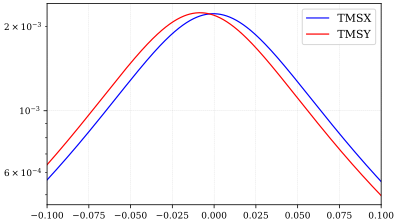

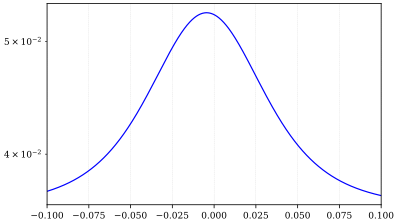

In [108]:
#sweep
model_KAGRA_1 = model_KAGRA.deepcopy()
model_KAGRA_1.parse("""
# ===== Power detector =====

/*
### tuning x-arm
xaxis* ETMY phi lin -0.15 0.15 1000
yaxis lin abs

### tuning y-arm
xaxis* ETMY phi lin -0.15 0.15 1000
yaxis lin abs
*/

### tuning x-arm and y-arm
xaxis* ETMX phi lin -0.10 0.10 1000
put* ETMY phi $x1

yaxis lin abs
maxtem 3
""")
model_KAGRA_1.phase=3


a_1 = model_KAGRA_1.run()
print(a_1.rundata)

plt.figure(1)
plt.semilogy(a_1.x, a_1["TMSX_DC"],label="TMSX")
plt.semilogy(a_1.x, a_1["TMSY_DC"],label="TMSY")
plt.legend()
plt.figure(2)
plt.semilogy(a_1.x, a_1["AS_DC"])

--------------------------------------------------------------
Running kat - Started at 2020-12-07 20:10:52.897156
 87% | ETA:  0:00:00 | Calculating                                             Used Finesse None at C:\Users\pirik\anaconda3\envs\py37\Library\bin\kat.exe

Finished in 1.70541 seconds

** Amplitude detector 'CR_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'CR_TMSX' specified without mode indices

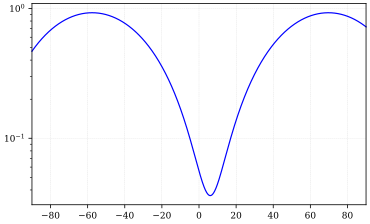

In [105]:
#sweep
model_KAGRA_1_BS = model_KAGRA.deepcopy()
model_KAGRA_1_BS.parse("""
# ===== Power detector =====


xaxis* bs1 phi lin -90 90 1000
yaxis lin abs
maxtem 3
""")
model_KAGRA_1_BS.phase=3


a = model_KAGRA_1_BS.run()
print(a.rundata)

plt.figure(1)
plt.semilogy(a.x, a["AS_DC"])

### not matching

## ETM and ITM

In [90]:
base2_2 = finesse.kat()
base2_2.verbose=True
base2_2.parse("""
    const f1 16.881M
    const f2 45.0159M
    const mf1 -16.881M
    const mf2 -45.0159M
    # ======== Input optics =====================
    l i1 1 0 n0
    s s_eo0 0 n0 n_eo1
    mod eom1 $f1 0.3 1 pm n_eo1 n_eo2
    s s_eo1 0 n_eo2 n_eo3
    mod eom2 $f2 0.3 1 pm n_eo3 n_eo4
    s s_eo2 0 n_eo4 nREFL

    
    # ======= Michelson ========================
    bs bs1 0.5 0.5 0 45 nREFL n2 n3 nAS
    s lx 26.4018 n3 nx1		#26.6649-thickness*1.754 #thicknese=0.15
    s ly 23.072 n2 ny1		#23.3351-thickness*1.754

    # ======== Thick ITMs ======================
    m IXAR 0 1 0 nx1 nx2
    s thick_IX 0.15 1.754 nx2 nx3
    #m ITMX 0.996 0.004 0 nx3 nx4
    m ITMX 0.996 0.004 -0.019 nx3 nx4

    m IYAR 0 1 0 ny1 ny2
    s thick_IY 0.15 1.754 ny2 ny3
    #m ITMY 0.996 0.004 90 ny3 ny4
    m ITMY 0.996 0.004 89.98 ny3 ny4   #+0.002

    # ========== Arm =======================
    s sx1 3000 nx4 nx5
    #m ETMX 0.999995 5e-06 0 nx5 nTMSX
    m ETMX 0.999995 5e-06 0.0085 nx5 nTMSX 

    s sy1 3000 ny4 ny5
    #m ETMY 0.999995 5e-06 90 ny5 nTMSY
    m ETMY 0.999995 5e-06 90.0083 ny5 nTMSY

    ad CR_REFL 0 nREFL
    ad SB1p_REFL $f1 nREFL
    ad SB1m_REFL $mf1 nREFL
    ad SB2p_REFL $f2 nREFL
    ad SB2m_REFL $mf2 nREFL

    pd0 REFL nREFL
    pd0 TMSX nTMSX
    
    ad CR_TMSX 0 nTMSX
    ad SB1p_TMSX $f1 nTMSX
    ad SB1m_TMSX $mf1 nTMSX
    ad SB2p_TMSX $f2 nTMSX
    ad SB2m_TMSX $mf2 nTMSX
    
    # =========  HOM Expansion =======
    #attr bs1 Rc 0
    attr ITMX Rc -1900.   # measured -1904.6
    attr ETMX Rc 1900.    # measured  1908.24
    attr ITMY Rc -1900.    # measured -1904.4
    attr ETMY Rc 1900.   # measured  1905.55
    attr IXAR Rc 0
    attr IYAR Rc 0

    cav XARM ITMX nx4 ETMX nx5
    cav YARM ITMY ny4 ETMY ny5
    gauss* input i1 n0 -1.02165697207616e3 293.479560905201
    
    """)

In [91]:
#KAGRA　mirror map

model_KAGRA_2 = base2_2.deepcopy()
model_KAGRA_2.parse("""
    
    map ITMX ITMXhr.txt
    knm ITMX ITMXhrFPMI2
    conf ITMX save_knm_binary 1
    conf ITMX interpolation_method 2
    conf ITMX integration_method 1
    conf ITMX knm_change_q 2
   
    map ITMX Apperture.txt
    knm ITMX ITMXabsFPMI2
    conf ITMX save_knm_binary 1
    conf ITMX interpolation_method 2
    conf ITMX integration_method 1
    
    
    map ETMX ETMXhr.txt
    knm ETMX ETMXhrFPMI2
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1

    map ETMX Apperture.txt
    knm ETMX ETMXabsFPMI2
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1
    
    
    map ITMY Apperture.txt
    knm ITMY ITMYabsFPMI2
    conf ITMY save_knm_binary 1
    conf ITMY interpolation_method 2
    conf ITMY integration_method 1

    map ITMY ITMYhr.txt
    knm ITMY ITMYhrFPMI2
    conf ITMY save_knm_binary 1
    conf ITMY interpolation_method 2
    conf ITMY integration_method 1

    map ETMY Apperture.txt
    knm ETMY ETMYabsFPMI2
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1

    map ETMY ETMYhr.txt
    knm ETMY ETMYhrFPMI2
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1
    """)

Parsing `map ITMX ITMXhr.txt` into pykat object not implemented yet, added as extra line.
Parsing `knm ITMX ITMXhrFPMI2` into pykat object not implemented yet, added as extra line.
Parsing `conf ITMX save_knm_binary 1` into pykat object not implemented yet, added as extra line.
Parsing `conf ITMX interpolation_method 2` into pykat object not implemented yet, added as extra line.
Parsing `conf ITMX integration_method 1` into pykat object not implemented yet, added as extra line.
Parsing `conf ITMX knm_change_q 2` into pykat object not implemented yet, added as extra line.
Parsing `map ITMX Apperture.txt` into pykat object not implemented yet, added as extra line.
Parsing `knm ITMX ITMXabsFPMI2` into pykat object not implemented yet, added as extra line.
Parsing `conf ITMX save_knm_binary 1` into pykat object not implemented yet, added as extra line.
Parsing `conf ITMX interpolation_method 2` into pykat object not implemented yet, added as extra line.
Parsing `conf ITMX integration_metho

--------------------------------------------------------------
Running kat - Started at 2020-12-07 19:53:50.401327
 76% | ETA:  0:00:00 | Calculating                                             Used Finesse None at C:\Users\pirik\anaconda3\envs\py37\Library\bin\kat.exe

Finished in 1.70303 seconds

** Amplitude detector 'CR_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'CR_TMSX' specified without mode indices

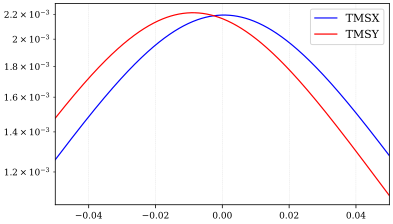

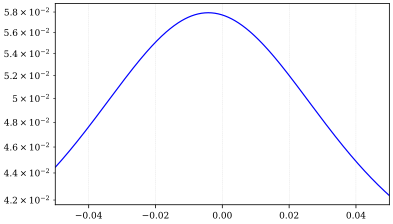

In [92]:
#sweep
model_KAGRA_2.parse("""
# ===== Power detector =====

pd0 TMSX_DC nTMSX
pd0 TMSY_DC nTMSY
pd0 AS_DC nAS
xaxis* ETMX phi lin -0.05 0.05 500
#xaxis* ETMX phi lin -90 90 1000
put* ETMY phi $x1

yaxis log abs

maxtem 3
""")
model_KAGRA_2.phase=3


a = model_KAGRA_2.run()
print(a.rundata)

plt.figure(1)
plt.semilogy(a.x, a["TMSX_DC"],label="TMSX")
plt.semilogy(a.x, a["TMSY_DC"],label="TMSY")
plt.legend()
plt.figure(2)
plt.semilogy(a.x, a["AS_DC"])


Removed existing object 'xaxis' of type <class
'pykat.commands.xaxis'> to add line 'xaxis* bs1 phi lin -90 90
1000'

--------------------------------------------------------------
Running kat - Started at 2020-12-07 19:55:14.502368
 87% | ETA:  0:00:00 | Calculating                                             Used Finesse None at C:\Users\pirik\anaconda3\envs\py37\Library\bin\kat.exe

Finished in 2.10866 seconds

** Amplitude detector 'CR_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2m_REFL' specified without mode indices, comput

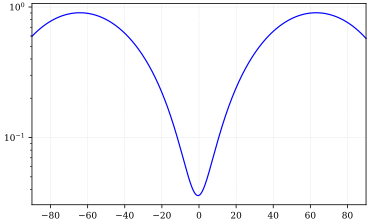

In [94]:
#sweep
model_KAGRA_2_BS = model_KAGRA_2.deepcopy()
model_KAGRA_2_BS.parse("""
# ===== Power detector =====


xaxis* bs1 phi lin -90 90 1000
yaxis lin abs
maxtem 3
""")
model_KAGRA_2_BS.phase=3


a_2 = model_KAGRA_2_BS.run()
print(a_2.rundata)

plt.figure(1)
plt.semilogy(a_2.x, a_2["AS_DC"])

## higher order mode

--------------------------------------------------------------
Running kat - Started at 2020-12-07 17:37:14.100710
 95% | ETA:  0:00:00 | Calculating                                             Used Finesse None at C:\Users\pirik\anaconda3\envs\py37\Library\bin\kat.exe

Finished in 5.90404 seconds

** Amplitude detector 'CR_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'CR_TMSX' specified without mode indices

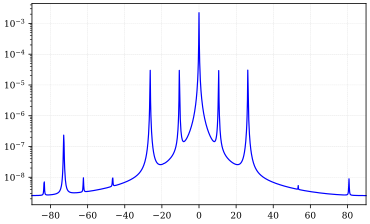

In [13]:
#高次モードで確認できるか
model_KAGRA_high = model_KAGRA.deepcopy()
model_KAGRA_high.parse("""
# ===== Power detector =====

pd0 nTMSX_DC nTMSX
xaxis* ETMX phi lin -90 90 1000
put* ETMY phi $mx1

yaxis log abs

maxtem 5
""")
model_KAGRA_high.phase=3


a = model_KAGRA_high.run()
print(a.rundata)

plt.figure(1)
plt.semilogy(a.x, a["nTMSX_DC"])

## flat mirror map cross check

In [8]:
# flat　mirror mapで確認

model_flat = base2.deepcopy()
model_flat.parse("""
    /*
    map ITMX flat_mirror_data.txt
    knm ITMX ITMXhrFPMI2_flat
    conf ITMX save_knm_binary 1
    conf ITMX interpolation_method 2
    conf ITMX integration_method 1
    conf ITMX knm_change_q 2

    map ITMX Apperture.txt
    knm ITMX ITMXabsFPMI2_flat
    conf ITMX save_knm_binary 1
    conf ITMX interpolation_method 2
    conf ITMX integration_method 1
    */
    
    map ETMX flat_mirror_data.txt
    knm ETMX ETMXhrFPMI2_flat
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1

    map ETMX Apperture.txt
    knm ETMX ETMXabsFPMI2_flat
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1
    
    /*
    map ITMY Apperture.txt
    knm ITMY ITMYabsFPMI2_flat
    conf ITMY save_knm_binary 1
    conf ITMY interpolation_method 2
    conf ITMY integration_method 1

    map ITMY flat_mirror_data.txt
    knm ITMY ITMYhrFPMI2_flat
    conf ITMY save_knm_binary 1
    conf ITMY interpolation_method 2
    conf ITMY integration_method 1
    */
    
    map ETMY Apperture.txt
    knm ETMY ETMYabsFPMI2_flat
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1

    map ETMY flat_mirror_data.txt
    knm ETMY ETMYhrFPMI2_flat
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1
    
    """)

Parsing `map ETMX flat_mirror_data.txt` into pykat object not implemented yet, added as extra line.
Parsing `knm ETMX ETMXhrFPMI2_flat` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX save_knm_binary 1` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX interpolation_method 2` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX integration_method 1` into pykat object not implemented yet, added as extra line.
Parsing `map ETMX Apperture.txt` into pykat object not implemented yet, added as extra line.
Parsing `knm ETMX ETMXabsFPMI2_flat` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX save_knm_binary 1` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX interpolation_method 2` into pykat object not implemented yet, added as extra line.
Parsing `conf ETMX integration_method 1` into pykat object not implemented yet, added as extra line.
Parsing `m

Parsing `pause 3` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2020-12-07 16:29:06.688381
 95% | ETA:  0:00:00 | Calculating                                             Used Finesse None at C:\Users\pirik\anaconda3\envs\py37\Library\bin\kat.exe

Finished in 6.40133 seconds

** Amplitude detector 'CR_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB1m_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2p_REFL' specified without mode indices, computing average amplitude (and dummy phase) over all modes.
** Amplitude detector 'SB2m_REFL' specified without mode indices, computing average amplitude (and dummy phase) 

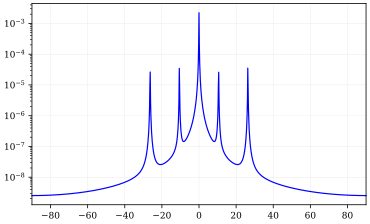

In [9]:
model_flat.parse("""
### tuning
pd0 nTMSX_DC nTMSX
xaxis* ETMX phi lin -90 90 1000
yaxis lin abs
pause 3
trace 8
maxtem 5
""")
a2_flat = model_flat.run()
print(a2_flat.rundata)

plt.figure(1)
plt.semilogy(a2_flat.x, a2_flat["nTMSX_DC"])

In [ ]:
#